*   Nama: Ichsan Setiawan
*   NIM: 25/562584/PPA/07067
*   Kelas: Pembelajaran Mesin dan Aplikasinya
*   Dosen Pengampu: Yunita Sari, S.Kom., M.Sc., Ph.D.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

*   Dataset: English Premier League Stats (2021-2024) - berisi data statistik seluruh pertandingan sepak bola di liga Inggris dari tahun 2021 s.d. 2024
*   Task: Regresi - Memprediksi berapa gol yang akan dicetak oleh tim tuan rumah berdasarkan statistik pertandingan di Liga Inggris (2021-2024)





In [2]:
file_path = "mydata.csv"

df_epl_stats = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "mohamadsallah5/english-premier-league-stats20212024", file_path)

/tmp/ipython-input-502175764.py:3: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_epl_stats = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "mohamadsallah5/english-premier-league-stats20212024", file_path)


100%|██████████| 243k/243k [00:00<00:00, 1.33MB/s]


In [3]:
print(df_epl_stats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1140 non-null   object 
 1   clock             1140 non-null   object 
 2   stadium           1140 non-null   object 
 3   class             1140 non-null   object 
 4   attendance        1140 non-null   object 
 5   Home Team         1140 non-null   int64  
 6   Goals Home        1140 non-null   int64  
 7   Away Team         1140 non-null   int64  
 8   Away Goals        1140 non-null   int64  
 9   home_possessions  1140 non-null   float64
 10  away_possessions  1140 non-null   float64
 11  home_shots        1140 non-null   int64  
 12  away_shots        1140 non-null   int64  
 13  home_on           1140 non-null   int64  
 14  away_on           1140 non-null   int64  
 15  home_off          1140 non-null   int64  
 16  away_off          1140 non-null   int64  


In [4]:
print(df_epl_stats.head(5))

            date   clock                  stadium class attendance  Home Team  \
0  28th May 2023  4:30pm         Emirates Stadium     h     60,095          2   
1  28th May 2023  4:30pm               Villa Park     h     42,212          7   
2  28th May 2023  4:30pm  Gtech Community Stadium     h     17,120          9   
3  28th May 2023  4:30pm          Stamford Bridge     d     40,130         12   
4  28th May 2023  4:30pm            Selhurst Park     d     25,198         11   

   Goals Home  Away Team  Away Goals  home_possessions  ...  away_duels  \
0           5         13           0              51.0  ...        52.2   
1           2          6           1              40.3  ...        47.8   
2           1          1           0              34.4  ...        50.0   
3           1          4           1              64.4  ...        45.5   
4           1         16           1              66.0  ...        41.7   

   home_saves  away_saves  home_fouls  away_fouls  home_yellow

In [5]:
print(df_epl_stats.tail(5))

            date    clock         stadium class attendance  Home Team  \
1135  13/09/2020   2:00pm   The Hawthorns     a          0         24   
1136   12/9/2020   8:00pm  London Stadium     a          0         14   
1137   12/9/2020   5:30pm         Anfield     h          0          5   
1138   12/9/2020   3:00pm   Selhurst Park     h          0         11   
1139   12/9/2020  12:30pm  Craven Cottage     a          0         10   

      Goals Home  Away Team  Away Goals  home_possessions  ...  away_duels  \
1135           0         18           3              35.8  ...        36.0   
1136           0          4           2              58.3  ...        59.5   
1137           4         19           3              48.8  ...        46.2   
1138           1         20           0              29.4  ...        50.0   
1139           0          2           3              45.6  ...        46.7   

      home_saves  away_saves  home_fouls  away_fouls  home_yellow  \
1135           4       

Descriptive Statistics

In [6]:
print(df_epl_stats.describe())

         Home Team   Goals Home    Away Team   Away Goals  home_possessions  \
count  1140.000000  1140.000000  1140.000000  1140.000000       1140.000000   
mean     11.450000     1.502632    11.450000     1.290351         50.816754   
std       6.815784     1.359450     6.815784     1.233457         12.896181   
min       1.000000     0.000000     1.000000     0.000000         17.900000   
25%       5.750000     0.750000     5.750000     0.000000         40.900000   
50%      11.000000     1.000000    11.000000     1.000000         50.850000   
75%      17.250000     2.000000    17.250000     2.000000         60.900000   
max      25.000000     9.000000    25.000000     7.000000         82.400000   

       away_possessions   home_shots   away_shots      home_on      away_on  \
count       1140.000000  1140.000000  1140.000000  1140.000000  1140.000000   
mean          49.205965    13.558772    11.474561     4.715789     4.039474   
std           12.899495     5.615658     5.048515  

Dari deskripsi dataset di atas, kita bia lihat:
1.   Dari 1140 data, variabel Goals Home (jumlah gol yang dicetak oleh tim tuan rumah) memiliki rata-rata sebesar 1.5 gol per pertandingan dan lebih tinggi daripada tim tamu yang memiliki rata-rata Away Goals (jumlah gol yang dicetak oleh tim tamu) sebesar 1.29
2.   Kemudian, dari segi penguasaan bola, tim tuan rumah (home_possessions) punya rata-rata penguasaan bola yang lebih tinggi dari tim tamu (away_possession), yaitu 50.81% per pertandingan dibanding 49.20%
3.   Jumlah tembakan tepat sasaran yang dilepaskan oleh tim tuan rumah (home_on) juga lebih banyak dibanding tim tamu (away_on), yaitu 4.71 shots on target per pertandingan dibanding 4.03 shots on target per pertandingan

Visualisasi: 1) Histogram

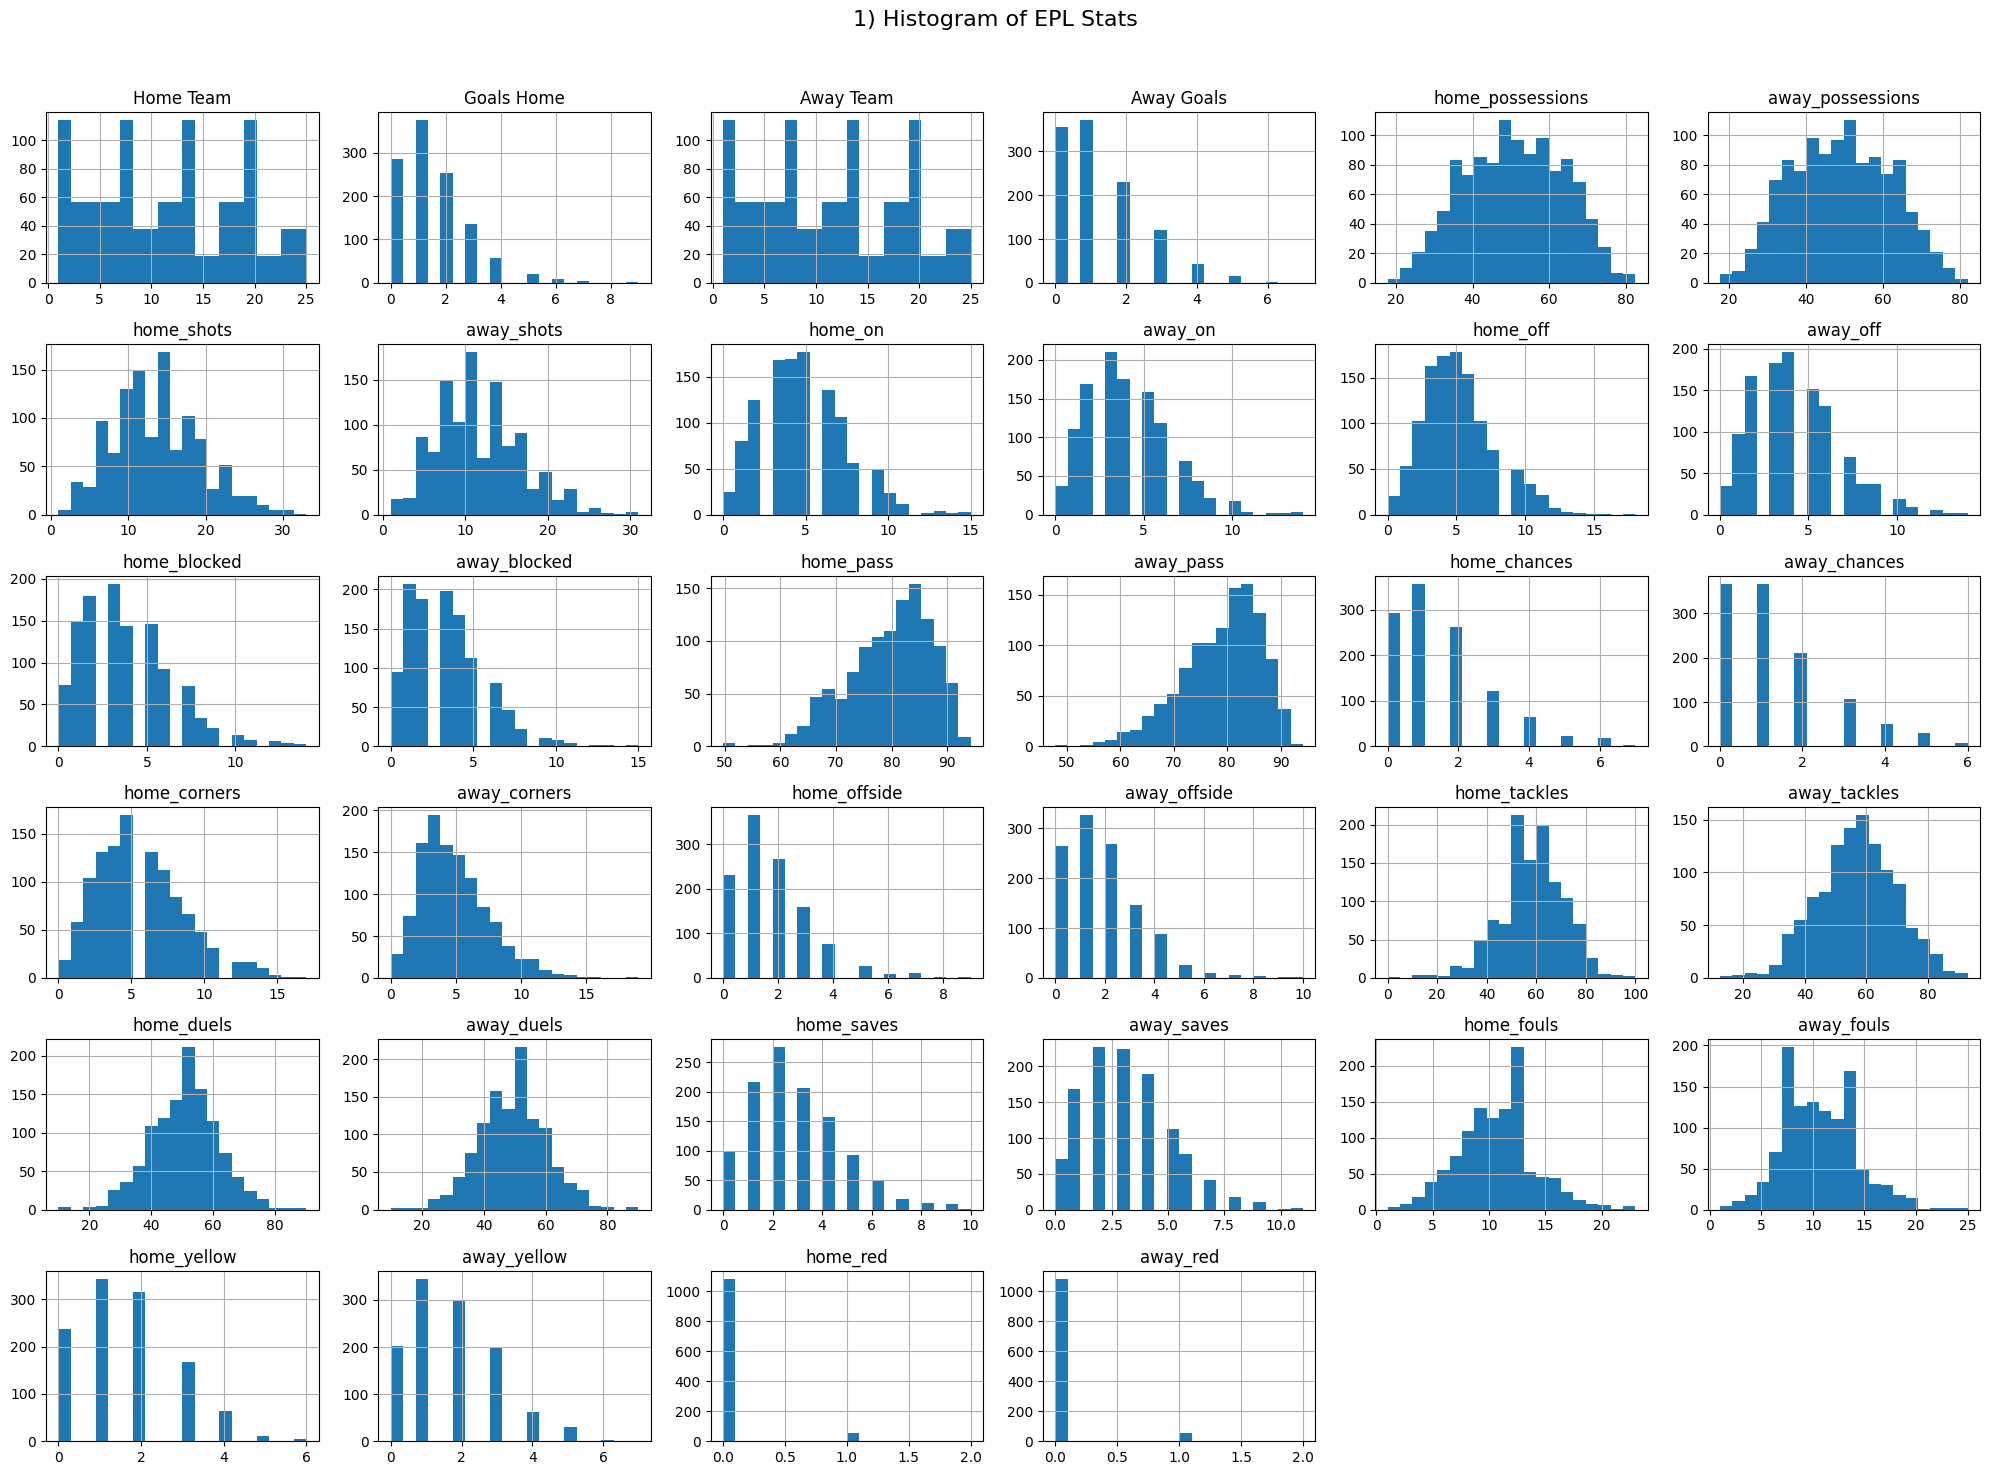

In [15]:
df_epl_stats.hist(figsize=(20,15), bins=20)
plt.suptitle('1) Histogram of EPL Stats', fontsize=16)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

Visualisasi: 2) Boxplot

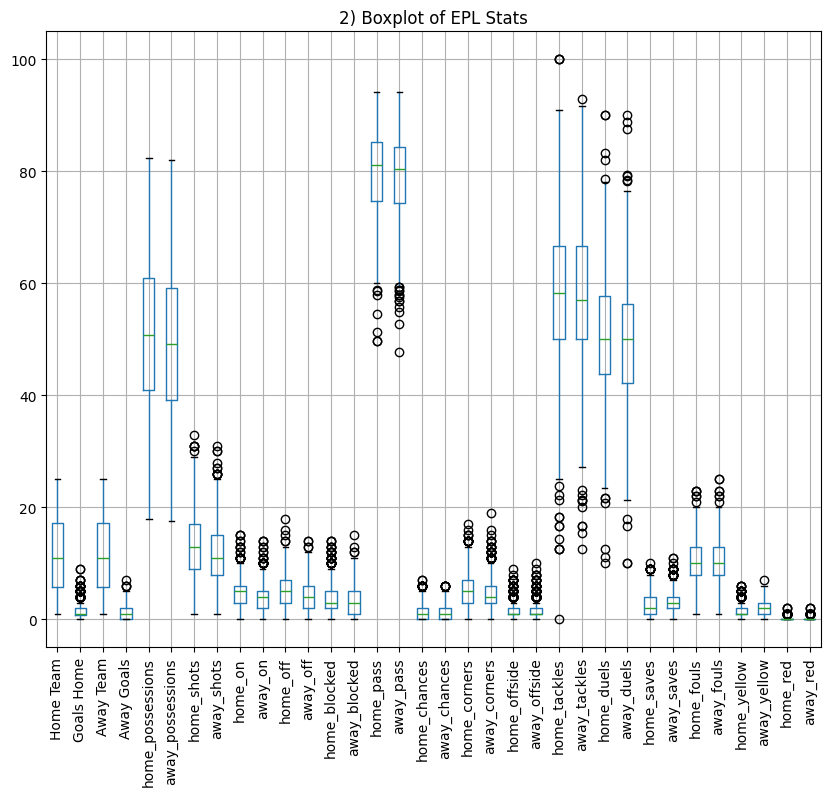

In [8]:
df_epl_stats.boxplot(figsize=(10,8))
plt.title('2) Boxplot of EPL Stats')
plt.xticks(rotation=90)
plt.show()

Dari visualisasi boxplot di atas, kita bisa lihat distribusi data dari masing-masing variabel:
1.   Tim tuan rumah mencetak gol (Goals Home) lebih banyak dibanding tim tamu (Away Goals), dapat dilihat juga bahwa terdapat banyak outlier pada variabel Goals Home, artinya ada kasus dimana tim tuan rumah mencetak gol yang sangat banyak
2.   Tim tuan rumah memiliki penguasaan bola (home_possessions) yang lebih tinggi (sekitar di atas 40% s.d. di atas 60%) dibanding tim tamu (away_possessions, sekitar 40% s.d. di bawah 60%), artinya tim tuan rumah lebih sering menguasai bola daripada tim tamu
3.   Tim tuan rumah memiliki jumlah shot dan shot on target (home_shots dan home_on, tendangan ke arah gawang) yang lebih banyak dibanding tim tamu (away_shots dan away_on)



Visualisasi: 3) Heatmap

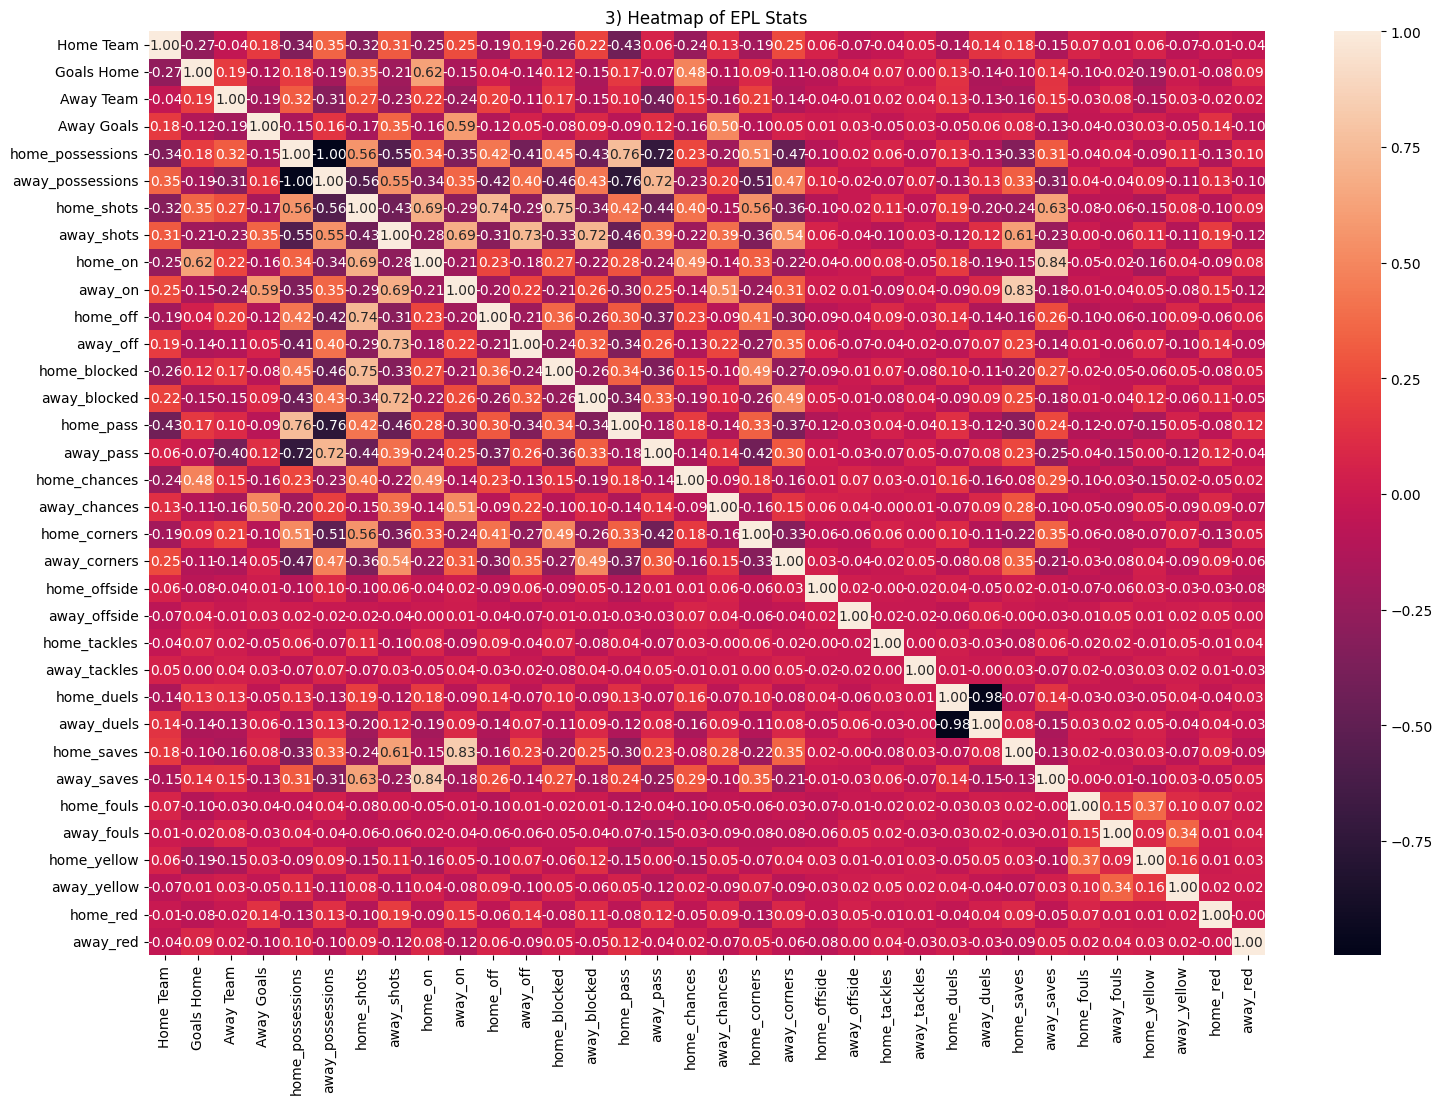

In [9]:
plt.figure(figsize=(18,12))
df_epl_stats_num = df_epl_stats.select_dtypes(include=['int64','float64'])
sns.heatmap(df_epl_stats_num.corr(), annot=True, fmt='.2f')
plt.title('3) Heatmap of EPL Stats')
plt.show()

Dari visualisasi heatmap di atas, kita bisa lihat hubungan antar variabel:
1.   Hubungan antara home_on (tembakan dari tim tuan rumah yang tepat sasaran) dengan Goals Home (gol yang diciptakan oleh tim tuan rumah) memiliki nilai sebesar 0.62, artinya kedua variabel memiliki korelasi yang cukup tinggi. Semakin banyak tembakan yang tepat sasaran, maka semakin besar peluang gol tercipta
2.   Hubungan antara home_on dengan away_saves (penyelamatan gawang oleh kiper) memiliki nilai sebesar 0.84, artinya kedua variabel ini memiliki korelasi yang tinggi. Semakin banyak tembakan yang dilakukan oleh tim tuan rumah ke arah gawang tim tamu, semakin banyak kiper tim tamu harus melakukan penyelamatan agar gawangnya tidak kebobolan. Nilainya sedikit lebih tinggi dibanding hubungan antara away_on dan home_saves sebesar 0.83, artinya tim tuan rumah sedikit lebih dominan daripada tim tamu



Visualisasi: 4) Pairplot

<Figure size 1000x800 with 0 Axes>

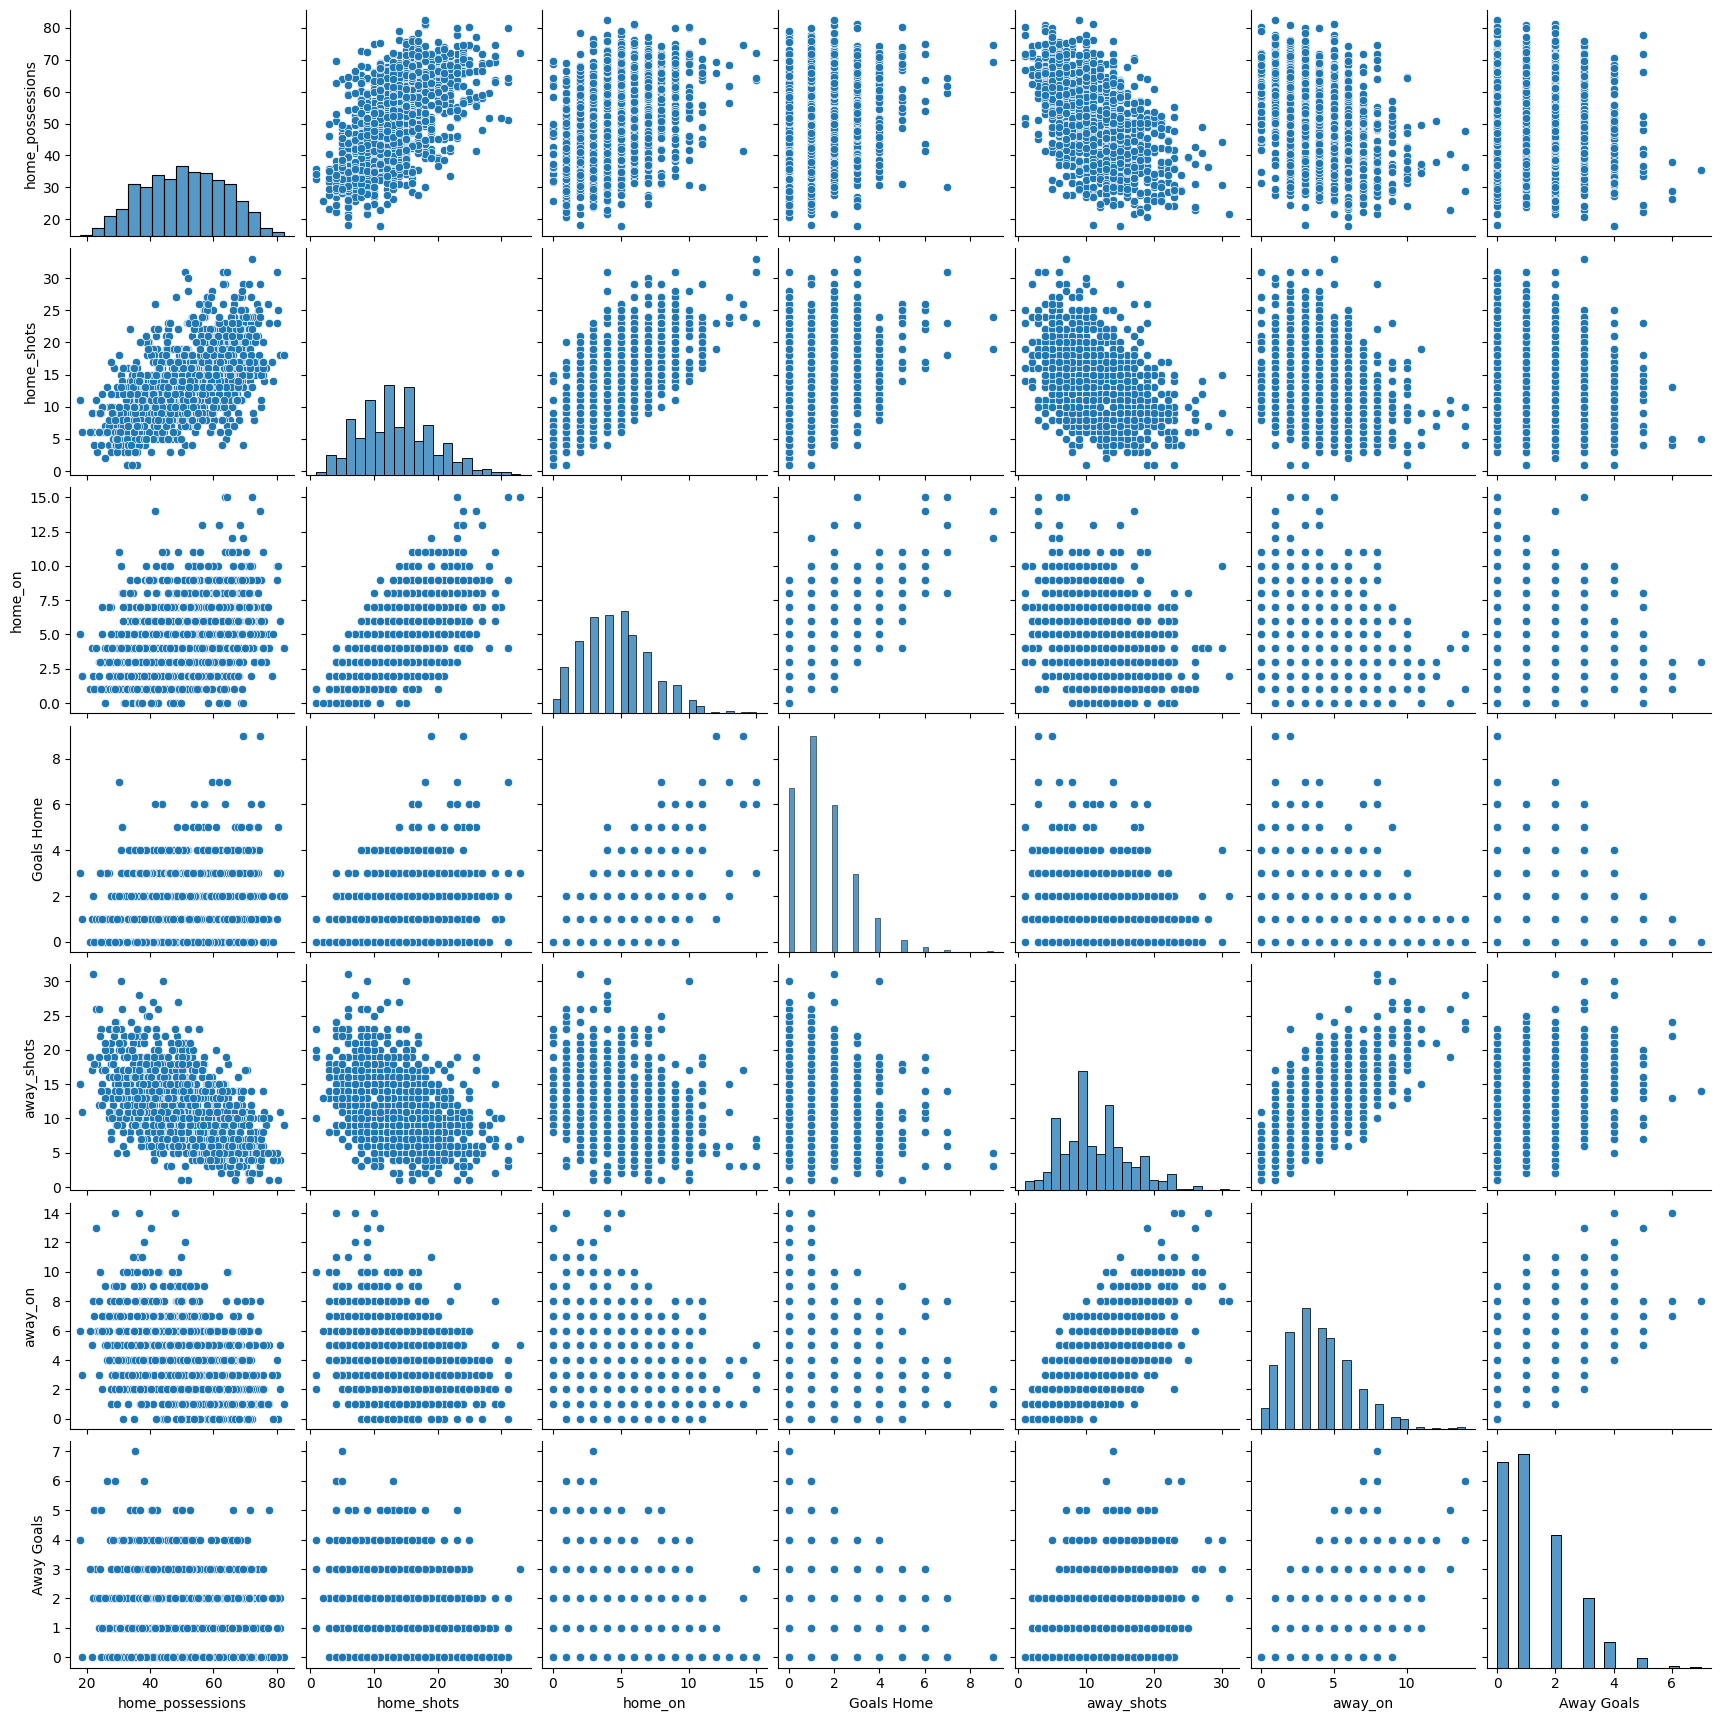

In [10]:
plt.figure(figsize=(10,8))
sns.pairplot(df_epl_stats[['home_possessions','home_shots','home_on','Goals Home', 'away_shots', 'away_on', 'Away Goals']])
plt.show()

Dari visualisasi pairplot di atas, kita bisa lihat hubungan dan distribusi data dari variabel-variabel yang sudah dipilih dari dataset:
1.   Kita bisa lihat hubungan antara Goals Home dengan Away Goals, ada indikasi bahwa tim tuan rumah mencetak gol yang lebih banyak dan tim tamu tidak dapat membalasnya (tim tuan rumah mencetak gol yang lebih banyak daripada tim tamu)
2.   Kita juga bisa lihat hubungan antara home_on dengan away_on, ada indikasi bahwa tim tuan rumah melepaskan tembakan tepat sasaran yang lebih banyak daripada tim tamu

Visualisas: 5) Violinplot

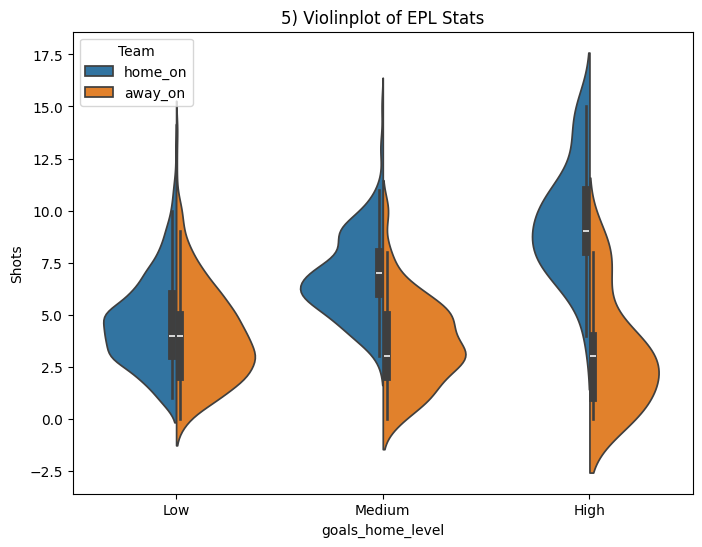

In [11]:
df_epl_stats['goals_home_level'] = pd.cut(df_epl_stats['Goals Home'], bins=[0,2,4,10], labels=['Low', 'Medium', 'High'])
df_epl_stats_long = pd.melt(df_epl_stats, id_vars=['goals_home_level'], value_vars=['home_on', 'away_on'], var_name='Team', value_name='Shots')

plt.figure(figsize=(8,6))
sns.violinplot(x='goals_home_level', y='Shots', hue='Team', data=df_epl_stats_long, split=True)
plt.title('5) Violinplot of EPL Stats')
plt.show()

Dari visualisasi violinplot di atas, kita bisa lihat korelasi antara jumlah gol yang diciptakan oleh tim tuan rumah (Goals Home) dengan jumlah tembakan yang mengarah ke gawang atau tepat sasaran yang dilepaskan oleh tim tuan rumah (home_on) dan tim tamu (away_on):
1.   Ketika tim tuan rumah menciptakan gol yang sedikit, tembakan tepat sasaran yang dilepaskan tim tuan rumah dan tim tamu cenderung sama
2.   Ketika tim tuan rumah menciptakan gol yang lebih banyak, maka tim tuan rumah memiliki jumlah tembakan tepat sasaran yang semakin banyak
3.   Ketika tim tuan rumah menciptakan gol yang banyak, maka tim tuan rumah memiliki jumlah tembakan tepat sasaran yang jauh lebih banyak dibanding tembakan tepat sasaran yang dilepaskan oleh tim tamu yang jumlahnya menjadi semakin kecil

In [12]:
correlation_analysis = df_epl_stats.corr(numeric_only=True)['Goals Home'].sort_values(ascending=False)
print(correlation_analysis)

Goals Home          1.000000
home_on             0.621186
home_chances        0.482039
home_shots          0.354652
Away Team           0.186964
home_possessions    0.184580
home_pass           0.171819
away_saves          0.142630
home_duels          0.134668
home_blocked        0.116458
home_corners        0.089137
away_red            0.085561
home_tackles        0.068596
home_off            0.038499
away_offside        0.036226
away_yellow         0.006982
away_tackles        0.004773
away_fouls         -0.021806
away_pass          -0.073604
home_red           -0.079354
home_offside       -0.081808
home_fouls         -0.100467
home_saves         -0.104451
away_chances       -0.107212
away_corners       -0.111282
Away Goals         -0.118525
away_off           -0.138538
away_duels         -0.140483
away_on            -0.150162
away_blocked       -0.153166
away_possessions   -0.185589
home_yellow        -0.194787
away_shots         -0.206330
Home Team          -0.269561
Name: Goals Ho

Beberapa variabel yang memengaruhi tim tuan rumah dalam mencetak gol:
1.   home_on (jumlah tembakan tepat sasaran yang dilepaskan oleh tim tuan rumah)
2.   home_chances (jumlah peluang gol yang diciptakan oleh tim tuan rumah)
3.   home_shots (jumlah tembakan yang dilepaskan oleh tim tuan rumah)
4.   Away Team (tim tamu)
5.   home_possessions (persentase penguasaan bola dari tim tuan rumah)
6.   home_pass (jumlah operan yang dilakukan oleh tim tuan rumah)
7.   away_saves (jumlah penyelamatan yang dilakukan oleh kiper tim tamu)



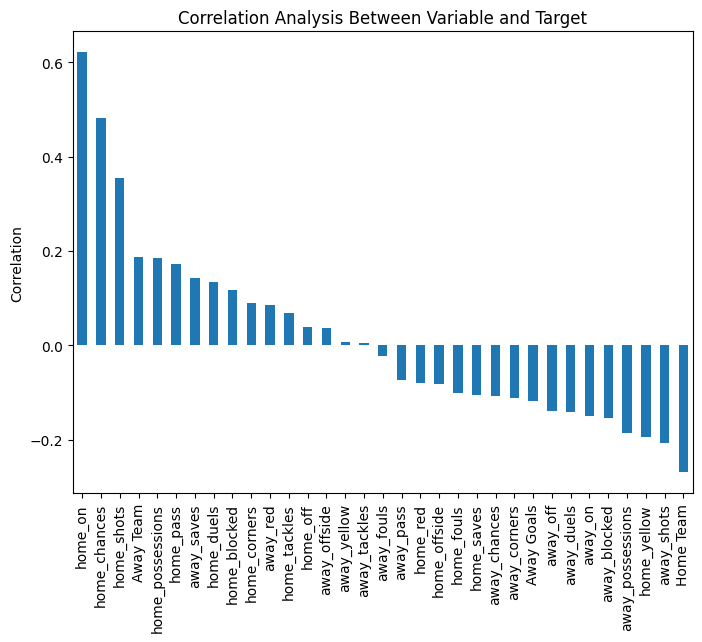

In [13]:
plt.figure(figsize=(8,6))
correlation_analysis.drop('Goals Home').plot(kind='bar')
plt.title("Correlation Analysis Between Variable and Target")
plt.ylabel("Correlation")
plt.show()